In [19]:
import sys  
sys.path.insert(0, '../scripts')
import numpy as np
import indexes, use_data, IsInclude
import pandas as pd
from shapely import wkt,MultiLineString
import ast
import warnings
warnings.filterwarnings('ignore')
import aux_plot

## Some graphics and maps

In [20]:
geo_df = use_data.create_gdf('simulations_reel_gdf.csv','start')


In [25]:
sample = use_data.get_itineraire(640,geo_df)

In [26]:
sample

,id_simulation,id_utilisateur,itineraire,start,ID_COM,cheflieu,geometry
5,640,39.0,LINESTRING (695141.9075638466 6784767.12569180...,POINT (695141.9075638466 6784767.125691806),COMMUNE_0000000009741607,POINT (694296.2 6782889.9),POINT (695141.908 6784767.126)


In [37]:
sample_gdf= IsInclude.IsIn_tournee_gdf(sample,geo_df,100000,2).shape[0]

In [230]:
liste = np.arange(25000,200001,25000,dtype=int)
liste

array([ 25000,  50000,  75000, 100000, 125000, 150000, 175000, 200000])

In [209]:
from tqdm import tqdm

In [233]:
empty_list=[]
for row in  tqdm(geo_df.values):
    empty_list = empty_list + [[IsInclude.IsIn_tournee_gdf(use_data.get_itineraire(row[0],geo_df),geo_df,x,1).shape[0] for x in liste]]

100%|██████████| 1097/1097 [07:36<00:00,  2.40it/s]


In [234]:
df = pd.DataFrame(empty_list, columns=liste)


In [235]:
df['index']=df.index

In [236]:
df =df.melt(id_vars='index')

In [237]:
df

,index,variable,value
0,0,25000,10
1,1,25000,0
2,2,25000,0
3,3,25000,0
4,4,25000,0
...,...,...,...
8771,1092,200000,374
8772,1093,200000,205
8773,1094,200000,205
8774,1095,200000,205


In [238]:
import seaborn as sns

<Axes: xlabel='variable', ylabel='value'>

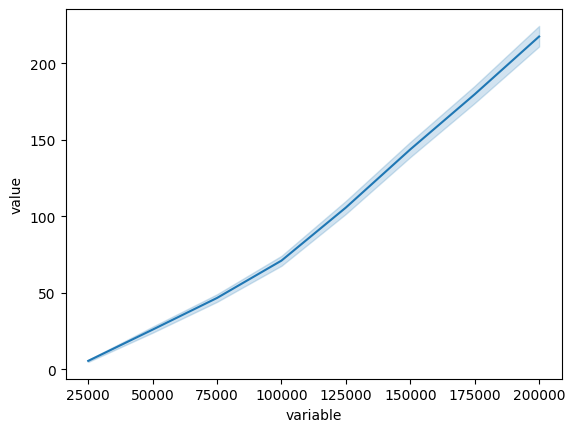

In [239]:
sns.lineplot(data=df,x='variable',y='value')
#sns.lineplot(data=df.mean())

In [ ]:
#see TQDM
